In [1]:
from scipy import stats



In [2]:
! python test_cross_dataset.py --help

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
*************************88
usage: test_cross_dataset.py [-h] [--dist_dir DIST_DIR] [--ref_dir REF_DIR]
                             [--names_info NAMES_INFO]
                             [--model_file MODEL_FILE] [--save_path SAVE_PATH]
                             [--patching_method PATCHING_METHOD]

PyTorch WaDIQaM-FR test on the whole cross dataset

optional arguments:
  -h, --help            show this help message and exit
  --dist_dir DIST_DIR   distorted images dir.
  --ref_dir REF_DIR     reference images dir.
  --names_info NAMES_INFO
                        .mat file that includes image names in the dataset.
  --model_file MODEL_FILE
                        model file (default: checkpoints/WaDIQaM-FR-
                        KADID-10K-EXP1000-5-lr=0.0001-bs=4)
  --save_path SAVE_PATH
                        save path (default: scores)
  --patching_method PATCHING_METHOD
                        random or variance


## ON LIVE

In [3]:
%%time
! python test_cross_dataset.py --patching_method=random  --dist_dir=databaserelease2 --ref_dir=reference_images --model_file=randomPatch-WaDIQaM-NR-LIVE-EXP44-5-lr=0.0001-bs=4 --names_info=LIVEfullinfo.mat

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
*************************88
CPU times: total: 78.1 ms500 @@@@@@@@@@@@@@@@@@@@@@@@@@ ['wn/img104.bmp', 'wn/img114.bmp', 'fastfading/img20.bmp', 'wn/img70.bmp', 'gblur/img115.bmp', 'wn/img85.bmp', 'jpeg/img103.bmp', 'jpeg/img124.bmp', 'gblur/img69.bmp', 'jp2k/img28.bmp', 'jpeg/img14.bmp', 'jp2k/img156.bmp', 'wn/img55.bmp', 'jpeg/img67.bmp', 'wn/img100.bmp', 'fastfading/img96.bmp', 'wn/img41.bmp', 'jp2k/img162.bmp', 'gblur/img131.bmp', 'jpeg/img107.bmp', 'fastfading/img47.bmp', 'jpeg/img59.bmp', 'fastfading/img93.bmp', 'wn/img132.bmp', 'jp2k/img120.bmp', 'jpeg/img85.bmp', 'gblur/img89.bmp', 'jpeg/img83.bmp', 'jpeg/img15.bmp', 'wn/img101.bmp', 'gblur/img57.bmp', 'jp2k/img116.bmp', 'jp2k/img29.bmp', 'fastfading/img19.bmp', 'wn/img36.bmp', 'jp2k/img208.bmp', 'jpeg/img100.bmp', 'fastfading/img81.bmp', 'jp2k/img34.bmp', 'gblur/img78.bmp', 'jp2k/img2.bmp', 'fastfading/img142.bmp', 'fastfading/img101.bmp', 'jp2k/img150.bmp', 'wn/img5.bmp', 'jpeg/img147.bmp', 'wn/im

In [4]:
import numpy as np
predicts = np.load('scores.npy')

In [5]:
import h5py

Info = h5py.File("LIVEfullinfo.mat", 'r')
scale = Info['subjective_scores'][0, :].max()
mos = Info['subjective_scores'][0, :] / scale #
mos_std = Info['subjective_scoresSTD'][0, :] / scale

In [6]:
rands_index = []
with open("tmp_imgIndex.txt", "r") as f:
  for line in f:
    rands_index.append(int(line.strip()))

In [7]:
mos_ = []
mos_std_ = []
for i in rands_index:
    mos_.append(mos[i])
    mos_std_.append(mos_std[i])

In [8]:
len(predicts)

500

In [9]:
len(mos_)

500

In [10]:

stats.spearmanr(mos_, predicts)

SpearmanrResult(correlation=0.918134328537314, pvalue=2.4505873520579444e-202)

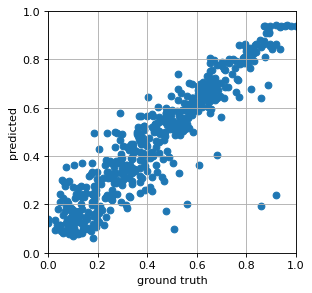

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(4,4), dpi=80)

# fig, ax = plt.subplots(figsize=(12, 12))

plt.xlabel("ground truth")
plt.ylabel("predicted")

plt.grid()

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.scatter(mos_, predicts)
plt.show()

## ON TID2013

In [29]:
! python test_cross_dataset.py --patching_method=random  --dist_dir=distorted_images --ref_dir=reference_images --model_file=randomPatch-WaDIQaM-NR-LIVE-EXP44-5-lr=0.0001-bs=4 --names_info=TID2013fullinfo.mat

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
*************************88
500 @@@@@@@@@@@@@@@@@@@@@@@@@@ ['i23_14_3.bmp', 'i24_17_5.bmp', 'i06_01_4.bmp', 'i14_19_3.bmp', 'i20_24_4.bmp', 'i17_15_5.bmp', 'i07_15_3.bmp', 'i22_15_5.bmp', 'i14_06_4.bmp', 'i17_22_3.bmp', 'i11_17_4.bmp', 'i17_04_1.bmp', 'i16_24_5.bmp', 'i06_09_4.bmp', 'i05_07_5.bmp', 'i06_08_5.bmp', 'i02_02_2.bmp', 'i25_17_4.bmp', 'i03_04_4.bmp', 'i10_03_1.bmp', 'i23_23_5.bmp', 'i17_02_4.bmp', 'i20_06_3.bmp', 'i08_22_2.bmp', 'i19_21_3.bmp', 'i12_23_3.bmp', 'i12_12_2.bmp', 'i03_09_5.bmp', 'I18_11_1.BMP', 'i07_08_2.bmp', 'i02_18_5.bmp', 'i25_10_1.bmp', 'i03_21_3.bmp', 'i25_04_4.bmp', 'i23_14_1.bmp', 'i18_15_1.bmp', 'i03_08_5.bmp', 'i22_12_2.bmp', 'i20_04_3.bmp', 'i20_06_1.bmp', 'i07_24_4.bmp', 'i16_15_2.bmp', 'i12_07_1.bmp', 'i04_18_4.bmp', 'i20_08_1.bmp', 'i05_13_3.bmp', 'i02_21_4.bmp', 'i11_01_2.bmp', 'i16_18_1.bmp', 'i14_11_4.bmp', 'i09_04_2.bmp', 'i22_10_4.bmp', 'i09_03_4.bmp', 'i03_04_1.bmp', 'i05_06_5.bmp', 'i24_05_3.bmp', 'i23_13_3.bmp

random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random----------------------
random--------

In [13]:
import numpy as np
predicts = np.load('scores.npy')

In [14]:
import h5py

Info = h5py.File("TID2013fullinfo.mat", 'r')
scale = Info['subjective_scores'][0, :].max()
mos = Info['subjective_scores'][0, :] / scale #
mos_std = Info['subjective_scoresSTD'][0, :] / scale

In [15]:
rands_index = []
with open("tmp_imgIndex.txt", "r") as f:
  for line in f:
    rands_index.append(int(line.strip()))

In [16]:
mos_ = []
mos_std_ = []
for i in rands_index:
    mos_.append(mos[i])
    mos_std_.append(mos_std[i])

In [17]:
predicts = 1 - predicts
len(predicts)

500

In [18]:
predicts[:10]

array([0.89859618, 0.73008728, 0.7796068 , 0.76525113, 0.89529372,
       0.84429894, 0.89612115, 0.84381653, 0.50494424, 0.83913061])

In [19]:
mos_[:10]

[0.7762371626313884,
 0.8187888205214927,
 0.753490641490708,
 0.6143958726361153,
 0.7403999561980458,
 0.5049505911184607,
 0.8124306064768675,
 0.9113855971966749,
 0.3611249339851877,
 0.7829807229817487]

In [20]:
len(mos_)

500

In [21]:
stats.spearmanr(mos_, predicts)

SpearmanrResult(correlation=0.34061469508096276, pvalue=4.7733868650054674e-15)

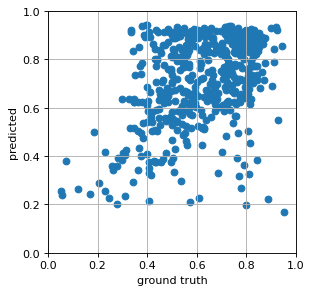

In [22]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(4,4), dpi=80)

# fig, ax = plt.subplots(figsize=(12, 12))

plt.xlabel("ground truth")
plt.ylabel("predicted")

plt.grid()

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.scatter(mos_, predicts)
plt.show()

## test on flipped images

In [23]:
from argparse import ArgumentParser
import torch
from torch import nn
import torch.nn.functional as F
from PIL import Image
from main import RandomCropPatches, VarianceThresholdPatchSelection, NRnet
import numpy as np
import h5py, os , random

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = NRnet(weighted_average=True).to(device)

model.load_state_dict(torch.load("variancePatch-WaDIQaM-NR-LIVE-EXP41-5-lr=0.0001-bs=4"))

<All keys matched successfully>

In [25]:
import glob

im_names = glob.glob('flipped_test/*')
im_names

['flipped_test\\a.bmp',
 'flipped_test\\a1.png',
 'flipped_test\\b.bmp',
 'flipped_test\\b1.png',
 'flipped_test\\c.bmp',
 'flipped_test\\c1.png',
 'flipped_test\\d.bmp',
 'flipped_test\\d1.png',
 'flipped_test\\e.bmp',
 'flipped_test\\e1.png']

In [26]:
model.eval()
scores = []   
with torch.no_grad():
        for i in range(len(im_names)):
            im = Image.open(os.path.join( im_names[i])).convert('RGB')
            # ref = Image.open(os.path.join(args.ref_dir, ref_names[i])).convert('RGB')
            # data = RandomCropPatches(im, ref)
            data = RandomCropPatches(im)
            
            dist_patches = data.unsqueeze(0).to(device)
            # ref_patches = data[1].unsqueeze(0).to(device)
            # score = model((dist_patches, ref_patches))

            score = model((dist_patches))
            scores.append(score.item())


            
 

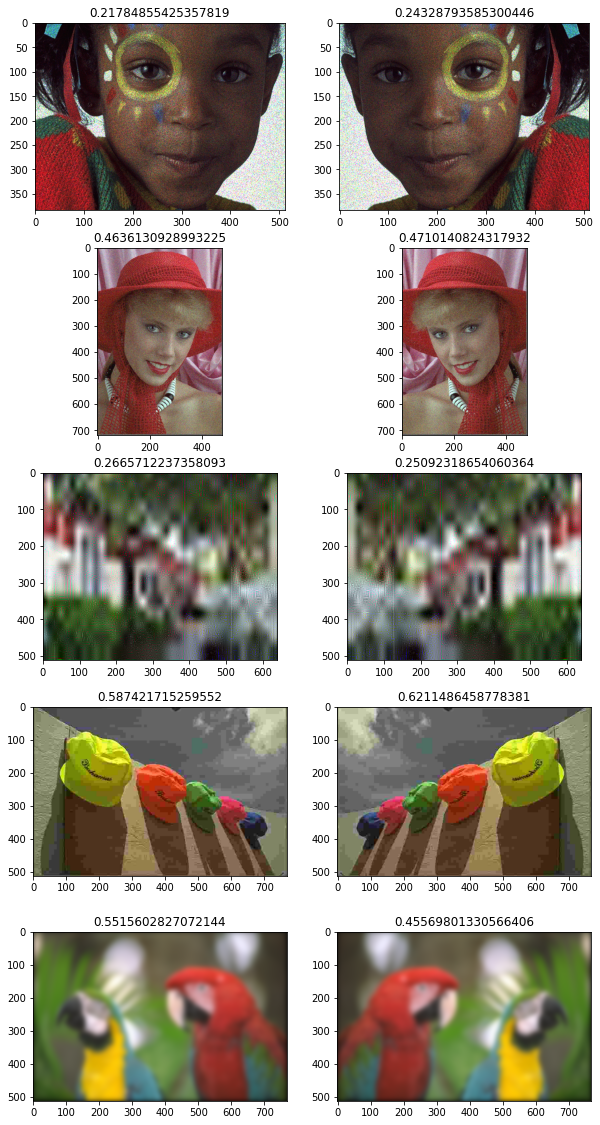

In [27]:
import cv2
f, axarr = plt.subplots(5,2 , figsize=(10, 20))
for i in range(len(im_names)//2):
    a = cv2.imread(im_names[i*2])
    b = cv2.imread(im_names[i*2+1])
    a = cv2.cvtColor(a, cv2.COLOR_RGB2BGR)
    b = cv2.cvtColor(b, cv2.COLOR_RGB2BGR)
    axarr[i,0].imshow(a)
    axarr[i,0].set_title(str(scores[i*2])) 
    axarr[i,1].imshow(b)
    axarr[i,1].set_title(str(scores[i*2+1])) 
  